# Cross Validation

- Train/Test Split : it provide *high variance* estimate since changing which observation to be in the testing set 
- K-fold

In [7]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


iris=load_iris()

x=iris.data   # data
y=iris.target # reponse target

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

print metrics.accuracy_score(y_test,y_pred)

1.0


# Change Train/Test or cross-validation

## steps for K-fold cross-validation

1. Split dataset into K *equal* partition(or "folds")
2. Use fold1 as the testing set and the uion of other folds as training set.
3. Calculate *testing accurary*
4. Repeat steps 2 and 3 Ktimes -> using diffrent folds as the testing set each time
5. Use the *average test accuracy*as the estimate of out-of-sample accuracy




****devide observation as columns!

our dataset contain **25 observation** (0 upto 24)


In [4]:
from sklearn.cross_validation import KFold
kf = KFold(25,n_folds=5,shuffle=False)

print '{} {:^61} {}'.format('Iteration','Training set observation','Testing set observation')
for iteration,data in enumerate(kf,start=1):
    print '{:^9} {} {:^25}'.format(iteration,data[0],data[1])

Iteration                   Training set observation                    Testing set observation
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


every observation is show once in test or train

# compare cross-validation to train/test split

* Adavantages of **cross-validation**
- more accurate estimate
- more efficient use of data

* Adavantages of **train/test split**
- Run k times faster than k-fold cross-validation
- simpler to examine



## Cross-validation recommendation

- K can be any number => k=10 is generally recommended.
- for classification problem => **startified sampling** is recommended
    - each response class should be represented with ** equal **proportion in each k fold
    - scikit-learn's cross_val_score functuon does this by default

In [15]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# 10-fold cross-validation with k=5 for KNN
knn = KNeighborsClassifier()

# cv=10 => 10-fold cross-validation
# scoring => accuracy  => classification accuracy
# in evaluation scikit learn document there is more cross-validation
scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')

print scores # it is accuracy

print type(scores) # numpy.ndarray

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
<type 'numpy.ndarray'>


In [17]:
# use average accuracy to estimate beter
print scores.mean()

0.966666666667


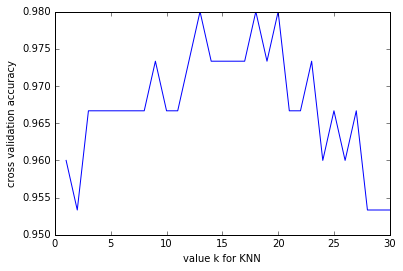

In [28]:
# optimal value for K in KNN

k_range = range(1,31)
k_scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

#print k_scores

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel('value k for KNN')
plt.ylabel('cross validation accuracy')

 we determine that knn=20 is better accuracy

<hr>
<hr>
# cross validation ex.
## model selection


**Goal** : Compare best KNN with  logistic regression in IRIS datase


In [30]:
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()


0.98


In [31]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print cross_val_score(logreg,x,y,cv=10,scoring='accuracy').mean()

0.953333333333


we conclude KNN is better choice for this perticular task

 # feature selection
 
 **Goal** Select wheter the Newspaper feature should be included in the linear regression model
 

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression



In [40]:
data = pd.read_csv('E:/A_Project/python-tutorial/Advertising.csv')

feature_cols=['TV','Radio','Newspaper']

x=data[feature_cols]
y=data.Sales

In [47]:
lm =LinearRegression()
scores=cross_val_score(lm,x,y,cv=10,scoring='mean_squared_error')
#print scores

#min square error => u want to minimize => sign flip it
mse_scores=-scores
print mse_scores

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [49]:
rmse_scores=np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [50]:
print rmse_scores.mean()

1.69135317081


### compare Newspaper feature

In [56]:
feature_cols=['TV','Radio']

x=data[feature_cols]


print np.sqrt(- cross_val_score(lm,x,y,cv=10,scoring='mean_squared_error')).mean()

1.67967484191


included newspaper => 1.69
exclude  newspaper => 1.67


minimum is good => ** excluded newspaper**


## - repeat cross validation
    - reapeat multiple time => diffrent random split in k-fold => average
    - more reliable estimate of out-of-sample performance by reducing the variance associated with single tiral 
    
## - Creating a hold-out set
    - "Hold-out" a portion of data **before** begining the model building process
    - locate the best model using cross-validaton on remain data => then test using hold-out set 
    - more reliable estimate of out-of-sample performance since hold-out set is** truly out-of sample**

## - Feature enginneering and selection within cross-validation iteration
    - normally, feature engineering and selection occurs **before** cross-validation
    - insted, perform all feature enginneering and selection **within each cross-validation iteration
    - more reliable of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

published by ** Mohammad khalooei** 11:33AM 24July